In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras import layers, models
import time
no = "74"
dataPath = "/content/drive/MyDrive/Colab Notebooks/project2/data/nifti"
# example_filename = os.path.join(data_path, 'example4d.nii.gz')
img1 = nib.load('{}/{}/image.nii.gz'.format(dataPath, no))
img2 = nib.load('{}/{}/mask.nii.gz'.format(dataPath, no))
print(img1.shape)

(512, 512, 561)


In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras import layers, models
import time
no = "2"
dataPath = "/content/drive/MyDrive/Colab Notebooks/project2/data/nifti"
# example_filename = os.path.join(data_path, 'example4d.nii.gz')
img1 = nib.load('{}/{}/image.nii.gz'.format(dataPath, no))
img2 = nib.load('{}/{}/mask.nii.gz'.format(dataPath, no))
xn = img1.shape[0]
yn = img1.shape[1]
zn = img1.shape[2]
imgs = { }
def readFile(no):
    global imgs, dataPath
    # example_filename = os.path.join(data_path, 'example4d.nii.gz')
    img1 = nib.load('{}/{}/image.nii.gz'.format(dataPath, no))
    img2 = nib.load('{}/{}/mask.nii.gz'.format(dataPath, no))
    xn = img1.shape[0]
    yn = img1.shape[1]
    zn = img1.shape[2]
    dImg = img1.get_data()
    dMask = img2.get_data()
    
    f = open('{}/{}/ranges.txt'.format(dataPath, no), "r")
    lines = f.readlines()
    valRange = [float(i) for i in (lines[0].split("(")[1].split(")")[0].split(" to "))]
    bounds = lines[1].split("; ")
    xs = [int(i) for i in bounds[0].split(": ")[1].split(")")[0].split(", ")]
    ys = [int(i) for i in bounds[1].split(": ")[1].split(")")[0].split(", ")]
    zs = [int(i) for i in bounds[2].split(": ")[1].split(")")[0].split(", ")]
    return { 'xn': xn, 'yn': yn, 'zn': zn, 'dImg': dImg, 'dMask': dMask, 'x0': xs[0], 'x1': xs[1], 'y0': ys[0], 'y1': ys[1], 'b': zs[0], 't': zs[1], 'z0': zs[0], 'z1': zs[1], 'width': xs[1] - xs[0], 'height': ys[1] - ys[0], 'depth': zs[1] - zs[0], "val0": valRange[0], "val1": valRange[1] }

In [3]:
def readImgBound(no):
    global dataPath
    f = open('{}/{}/ranges.txt'.format(dataPath, no), "r")
    lines = f.readlines()
    valRange = [float(i) for i in (lines[0].split("(")[1].split(")")[0].split(" to "))]
    bounds = lines[1].split("; ")
    xs = [int(i) for i in bounds[0].split(": ")[1].split(")")[0].split(", ")]
    ys = [int(i) for i in bounds[1].split(": ")[1].split(")")[0].split(", ")]
    zs = [int(i) for i in bounds[2].split(": ")[1].split(")")[0].split(", ")]
    return { 'x0': xs[0], 'x1': xs[1], 'y0': ys[0], 'y1': ys[1], 'b': zs[0], 't': zs[1], 'z0': zs[0], 'z1': zs[1], 'width': xs[1] - xs[0], 'height': ys[1] - ys[0], 'depth': zs[1] - zs[0], "val0": valRange[0], "val1": valRange[1] }

In [8]:
allBounds = { }
def readBoundAndShow():
    global allBounds
    print("w, h, d")
    w = 0
    h = 0
    d = 0
    for i in range(1, 101):
        bound = readImgBound(i)
        print("{}: {}, {}, {}".format(i, bound["width"], bound["height"], bound["depth"]))
        # if w < bound["width"]:
        #     w = bound["width"]
        # if h < bound["height"]:
        #     h = bound["height"]
        # if d < bound["depth"]:
        #     d = bound["depth"]
        w = w + bound["width"]
        h = h + bound["height"]
        d = d + bound["depth"]
    w = w / 100
    h = h / 100
    d = d / 100
    print("max: {}, {}, {}".format(w, h, d))
    allBounds["w"] = w
    allBounds["h"] = h
    allBounds["d"] = d
readBoundAndShow()

w, h, d
1: 93, 125, 18
2: 106, 122, 35
3: 100, 124, 34
4: 108, 116, 44
5: 119, 147, 44
6: 85, 124, 41
7: 110, 138, 35
8: 98, 100, 47
9: 102, 151, 44
10: 119, 167, 43
11: 90, 135, 42
12: 124, 152, 41
13: 111, 129, 40
14: 87, 147, 41
15: 103, 138, 50
16: 86, 114, 37
17: 89, 139, 40
18: 72, 117, 35
19: 112, 169, 43
20: 98, 118, 30
21: 95, 120, 34
22: 150, 157, 35
23: 99, 141, 37
24: 138, 162, 60
25: 67, 102, 45
26: 92, 133, 32
27: 124, 140, 39
28: 107, 129, 43
29: 75, 125, 43
30: 93, 130, 34
31: 96, 129, 38
32: 115, 113, 32
33: 98, 143, 30
34: 113, 169, 25
35: 113, 120, 46
36: 94, 110, 35
37: 94, 120, 34
38: 95, 111, 38
39: 112, 140, 39
40: 77, 89, 28
41: 90, 120, 38
42: 116, 158, 41
43: 86, 121, 31
44: 121, 125, 42
45: 138, 123, 38
46: 74, 113, 55
47: 70, 133, 23
48: 115, 127, 32
49: 93, 125, 39
50: 89, 118, 35
51: 94, 140, 38
52: 74, 106, 33
53: 106, 147, 33
54: 91, 120, 55
55: 88, 113, 20
56: 67, 118, 45
57: 96, 115, 38
58: 90, 118, 41
59: 100, 129, 34
60: 102, 119, 24
61: 102, 143, 25

In [22]:
allBounds = {'w': 128, 'h': 128, 'd': 195}
def printImg(img):
    plt.imshow(img)
    plt.show()

In [23]:
def getImg(z, y0 = 0, y1 = yn, x0 = 0, x1 = xn, dataConstant = True, vLow = 120, vHigh = 2000, ds = [ ], minValue = -2000, maxValue = 0):
    data = [ ]
    for y in range(y0, y1):
        dy = [ ]
        for x in range(x0, x1):
            if ds[x][y][z] > vLow and ds[x][y][z] < vHigh:
                if dataConstant:
                    dy.append(maxValue)
                else:
                    dy.append(ds[x][y][z])
            else:
                dy.append(minValue)
        data.append(dy)
    # print(maxValue)
    return data
def getImgBound(imgNo = 2, z = 0, dataConstant = True, vLow = 120, vHigh = 2000, ds = 'dImg', minValue = -2000, maxValue = 0):
    global imgs, allBounds
    if str(imgNo) not in imgs:
        imgs = { }
        imgs[str(imgNo)] = readFile(imgNo)
    imgBound = imgs[str(imgNo)]
    x0 = imgBound["x0"]
    x1 = imgBound["x1"]
    y0 = imgBound["y0"]
    y1 = imgBound["y1"]
    # if imgBound["width"] < allBounds["w"]:
    x0 = x0 - int((allBounds["w"] - imgBound["width"]) / 2)
    x1 = x0 + allBounds["w"]
    # if imgBound["height"] < allBounds["h"]:
    y0 = y0 - int((allBounds["h"] - imgBound["height"]) / 2)
    y1 = y0 + allBounds["h"]
    # print("x0: {}, x1: {}, y0: {}, y1: {}".format(x0, x1, y0, y1))
    return getImg(imgBound["b"] + z, y0, y1, x0, x1, dataConstant, vLow, vHigh, imgBound[ds], minValue, maxValue)
def getModelImgs(no, z, model):
    imgs = [ ]
    imgs.append(getImgBound(no, z, False, -2000, 2000, 'dImg'))
    imgs = np.array(imgs)
    imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
    overlapC = model2.predict(imgs)[0]
    
    imgD = getImgBound(no, z, False, -250, 250, 'dImg', -500, 500)
    for i in range(len(imgD)):
        for j in range(len(imgD[i])):
            if imgD[i][j] >= -250 and imgD[i][j] <= 250 and overlapC[int((imgD[i][j] + 250) / 5)] == 1:
                imgD[i][j] = 400
            elif imgD[i][j] >= -250 and imgD[i][j] <= 250:
                imgD[i][j] = -400
            elif imgD[i][j] < -250:
                imgD[i][j] = -400
            elif imgD[i][j] > 250:
                imgD[i][j] = 400
    # overlapC = [(0 if maskC * percent / 100 <= i else 1, maskC, i) for i in overlapC]
    # overlapC = [(0 if maskC * percent / 100 <= i else 1) for i in overlapC]
    return imgD
def getAllImgs(noFrom, noTo):
    global dataPath
    imgs = [ ]
    for no in range(noFrom, noTo):
        for z in range(0, readImgBound(no)["depth"]):
            imgs.append(getImgBound(no, z, False, -2000, 2000, 'dImg'))
        print(no)
    imgs = np.array(imgs)
    # print(imgs.shape)
    imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
    np.save("{}/0_range/organ2/{}-{}-skip0-x_128_1".format(dataPath, noFrom, noTo), imgs)
    return imgs
def getAllYVals(noFrom, noTo):
    imgs = [ ]
    for no in range(noFrom, noTo):
        for z in range(0, readImgBound(no)["depth"]):
            imgs.append(getImgBound(no, z, True, 1, 3, 'dMask', 0, 1))
        print(no)
    imgs = np.array(imgs)
    # print(imgs.shape)
    imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
    np.save("{}/0_range/organ1/y-border-{}-{}-128x128x2-skip0".format(dataPath, noFrom, noTo), imgs)
    return imgs

In [ ]:
imgD = getAllImgs(11, 101)
imgD.shape

In [25]:
imgY = getAllYVals(1, 100)
imgY.shape

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(3859, 128, 128, 1)

In [ ]:
def findEdge(img, imgBound, neighRange):
    def getNeighbourImg(imgBound, arr):
        img = [ [ 0 for i in range(imgBound["w"])] for j in range(imgBound["h"]) ]
        for i in arr:
            try:
                img[i[1]][i[0]] = 1
            except:
                print(i, imgBound, imgBound["w"], imgBound["h"])
        return img
    def isNeighbour2(img, x, y, val2, imgBound):
        c = 0
        cx = 0
        cy = 0
        for ty in range(-neighRange, neighRange + 1):
            for tx in range(-neighRange, neighRange + 1):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["w"] and y + ty < imgBound["h"] and img[y + ty][x + tx] == val2:
                    c = c + 1
                    cx = tx
                    cy = ty
                    break
        return (True, cx, cy) if c > 0 else (False, cx, cy)
    def getNeighbour(img, arr, x, y, val1, val2, imgBound):
        c = 0
        for ty in range(-neighRange, neighRange + 1):
            for tx in range(-neighRange, neighRange + 1):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["w"] and y + ty < imgBound["h"] and img[y + ty][x + tx] == val1 and isNeighbour2(img, x + tx, y + ty, val2, imgBound)[0]:
                    arr.append((x + tx, y + ty))
                    c = c + 1
        return c
    def markPoint(img, x, y, markValue, neighVal, imgBound):
        xStart = -1 if neighVal[1] == 0 else 0
        xEnd = 1 if neighVal[1] == 0 else 2 * neighVal[1]
        xStep = 1 if neighVal[1] == 0 else neighVal[1]
        yStart = -1 if neighVal[2] == 0 else 0
        yEnd = 1 if neighVal[2] == 0 else 2 * neighVal[2]
        yStep = 1 if neighVal[2] == 0 else neighVal[2]
        # print(xStart, xEnd, xStep, yStart, yEnd, yStep, markValue)
        for ty in range(yStart, yEnd, yStep):
            for tx in range(xStart, xEnd, xStep):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["w"] and y + ty < imgBound["h"]:
                    img[y + ty][x + tx] = markValue
    def markEdge(img, x, y, imgBound, currentVal, markValue, neighVal):
        arr = [(x, y)]
        c = 1
        while len(arr) > 0:
            f = arr.pop()
            markPoint(img, f[0],  f[1], markValue, neighVal, imgBound)
            c = c + getNeighbour(img, arr, f[0], f[1], currentVal, 10, imgBound)
            # print
            # plt.imshow(img)
            # plt.show()
            # print(img(arr[-1][1], arr[-1][0]))
            # print(img[arr[-1][1]][arr[-1][0]])
            # plt.imshow(getNeighbourImg(imgBound, arr))
            # plt.show()
            # time.sleep(2)
        return img
    for y in range(imgBound["h"]):
        for x in range(imgBound["w"]):
            neighVal = isNeighbour2(img, x, y, 10, imgBound)
            if img[y][x] == -10 and neighVal[0] == True:
                # print(neighVal)
                timg = markEdge(img, x, y, imgBound, -10, -20, neighVal)
                # plt.imshow(timg)
                # plt.show()
                # time.sleep(4)
                # reg = markSmallRegions(img, x, y, -10, -8, imgBound)
    return img
def resetImg(img, imgBound):
    for y in range(imgBound["h"]):
        for x in range(imgBound["w"]):
            if img[y][x] == -20:
                img[y][x] = 10
    return img
def setMarksInImg(img, markedImg, imgBound):
    for y in range(imgBound["h"]):
        for x in range(imgBound["w"]):
            if markedImg[y][x] == -20:
                img[y][x] = -20
    return img
def revalueImg(img, imgBound):
    for y in range(imgBound["h"]):
        for x in range(imgBound["w"]):
            if img[y][x] == -10:
                img[y][x] = 0
            elif img[y][x] == 10:
                img[y][x] = 2
            else:
                img[y][x] = 1
    return img
# 0, 2 for organ 3
# 2, 4 for organ 2
# 1, 3 for organ 1
def getBorderImg(no, z):
    tImgD = getImgBound(no, z, True, 1, 3, 'dMask', -10, 10)
    tImgD2 = getImgBound(no, z, True, 1, 3, 'dMask', -10, 10)
    tImgD = findEdge(tImgD, allBounds, 1)
    setMarksInImg(tImgD2, tImgD, allBounds)
    resetImg(tImgD, allBounds)
    return revalueImg(findEdge(tImgD, allBounds, 2), allBounds)
def getAllBorderYVals(noFrom, noTo):
    imgs = [ ]
    for no in range(noFrom, noTo):
        for z in range(0, readImgBound(no)["depth"]):
            imgs.append(getBorderImg(no, z))
        print(no)
    imgs = np.array(imgs)
    # print(imgs.shape)
    imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
    np.save("{}/0_range/organ1/y-border-{}-{}-128x128x3-skip0".format(dataPath, noFrom, noTo), imgs)
    return imgs

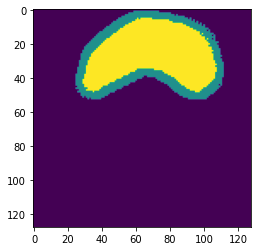

In [ ]:
printImg(getBorderImg(1, 12))

In [ ]:
imgY = getAllBorderYVals(100, 110)
imgY.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


100
101
102
103
104
105
106
107
108
109


(363, 128, 128, 1)

In [ ]:
printImg(getBorderImg(1, 15))

In [ ]:
def createModel():
    # state
    lastInit = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    # input layer
    inputLayer = layers.Input(shape=([allBounds["h"], allBounds["w"], 1]))
    # hidden layer
    hiddenLayer = layers.Conv2D(32, (3, 3), activation="relu")(inputLayer)
    hiddenLayer = layers.MaxPooling2D((2, 2))(hiddenLayer)
    hiddenLayer = layers.Conv2D(64, (3, 3), activation="relu")(hiddenLayer)
    hiddenLayer = layers.MaxPooling2D((2, 2))(hiddenLayer)
    hiddenLayer = layers.Conv2D(64, (3, 3), activation="relu")(hiddenLayer)
    hiddenLayer = layers.Flatten()(hiddenLayer)
    hiddenLayer = layers.Dense(200, activation="relu")(hiddenLayer)
    # output layer
    outputLayer = layers.Dense(100, activation="sigmoid", kernel_initializer=lastInit)(hiddenLayer)
    outputLayer = outputLayer * 1
    model = tf.keras.Model(inputLayer, outputLayer)
    return model
def double_conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    return x
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x
def build_unet_model(inX, inY):
    # inputs
    inputs = layers.Input(shape=(inX, inY, 1))
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = layers.Conv2D(3, 1, padding="same", activation = "softmax")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model
unet_model = build_unet_model(128, 128)
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")

In [ ]:
imgD = np.load("{}/0_range/organ2/{}-{}-skip0-x_128_1.npy".format(dataPath, 11, 101))
imgD.shape

(3505, 128, 128, 1)

In [ ]:
imgY = np.load("{}/0_range/{}-{}-skip0-y_128_border.npy".format(dataPath, 11, 101))
imgY.shape

(3505, 128, 128, 1)

In [ ]:
res = unet_model.fit(imgD, imgY, epochs=45)

Epoch 1/45
110/110 [==============================] - 59s 534ms/step - loss: 0.2891 - accuracy: 0.9630
Epoch 2/45
110/110 [==============================] - 52s 469ms/step - loss: 0.1930 - accuracy: 0.9640
Epoch 3/45
110/110 [==============================] - 53s 478ms/step - loss: 0.1640 - accuracy: 0.9644
Epoch 4/45
110/110 [==============================] - 52s 473ms/step - loss: 0.1492 - accuracy: 0.9646
Epoch 5/45
110/110 [==============================] - 52s 476ms/step - loss: 0.1412 - accuracy: 0.9647
Epoch 6/45
110/110 [==============================] - 52s 475ms/step - loss: 0.1321 - accuracy: 0.9648
Epoch 7/45
110/110 [==============================] - 52s 474ms/step - loss: 0.1300 - accuracy: 0.9649
Epoch 8/45
110/110 [==============================] - 52s 475ms/step - loss: 0.1251 - accuracy: 0.9649
Epoch 9/45
110/110 [==============================] - 52s 475ms/step - loss: 0.1207 - accuracy: 0.9649
Epoch 10/45
110/110 [==============================] - 52s 474ms/step - l

In [ ]:
unet_model.save("{}/0_range/organ2/model_{}-skip0-_128_border".format(dataPath, 100))

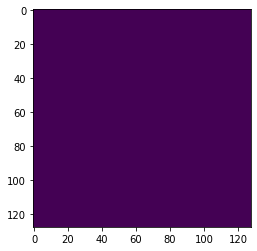

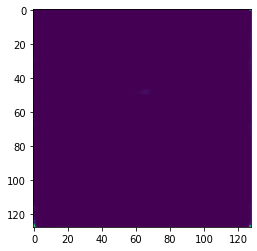

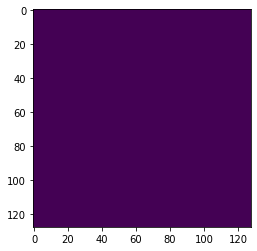

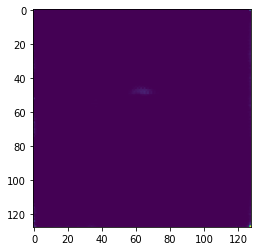

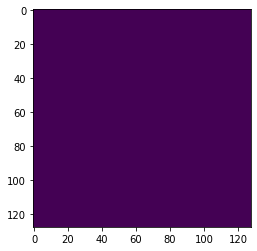

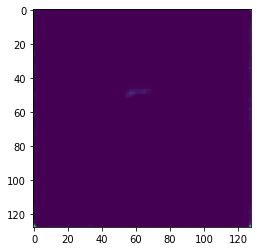

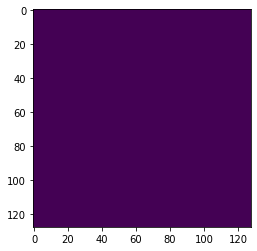

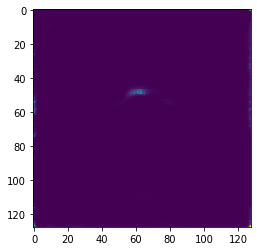

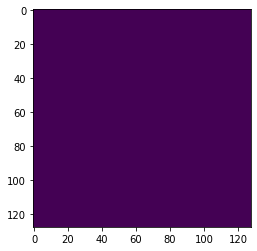

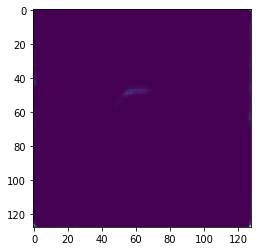

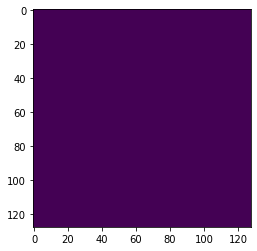

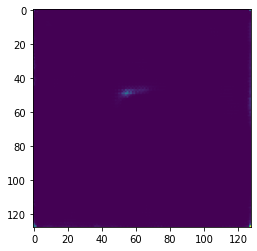

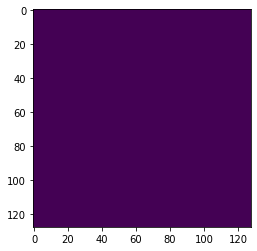

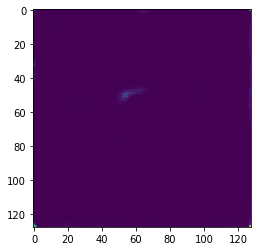

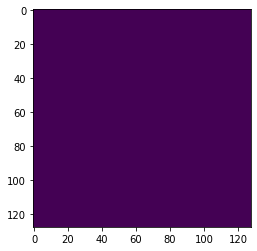

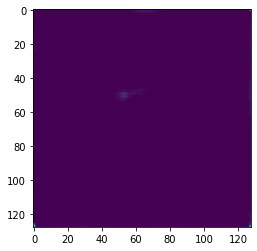

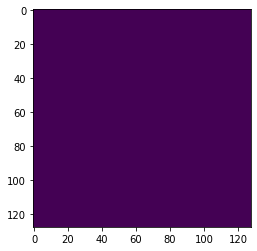

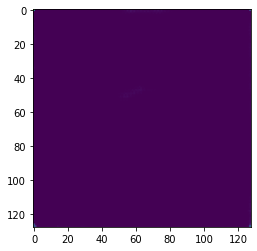

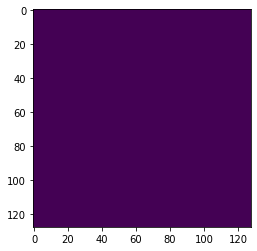

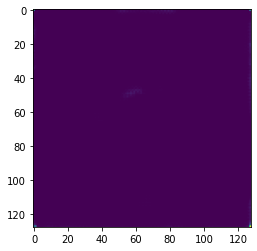

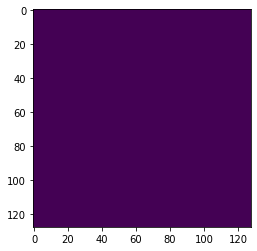

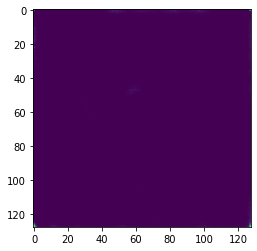

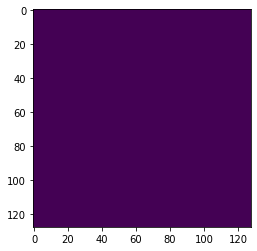

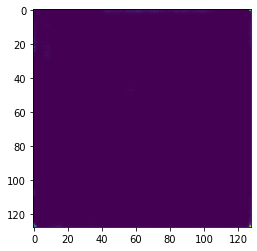

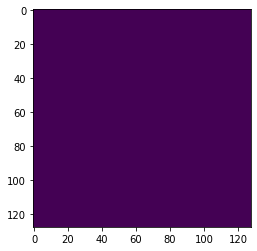

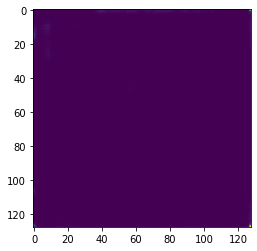

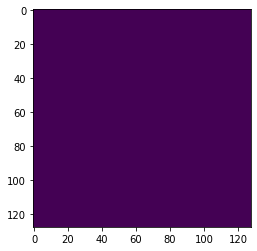

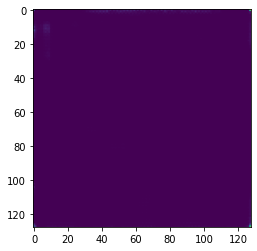

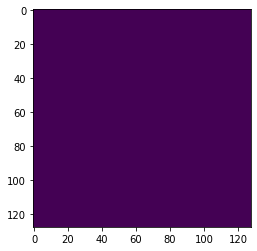

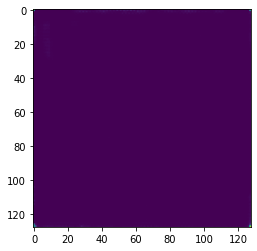

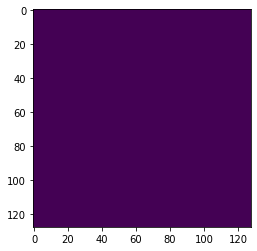

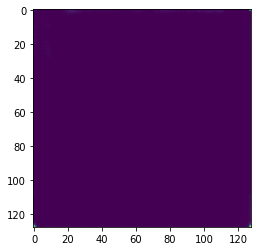

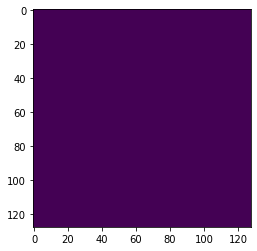

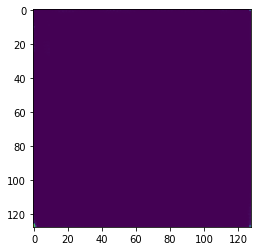

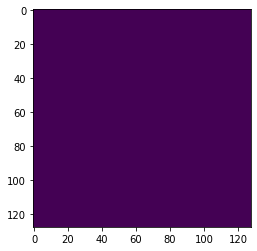

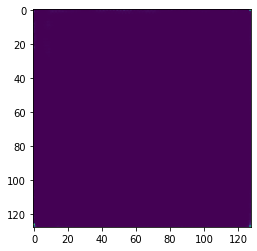

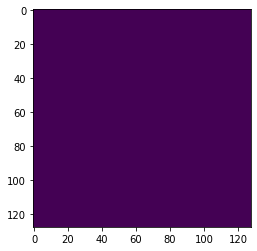

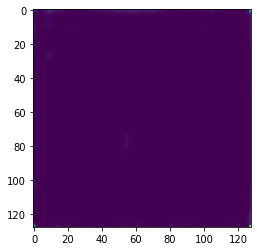

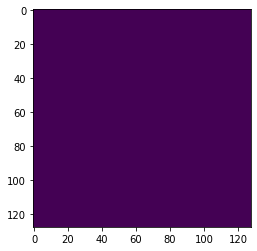

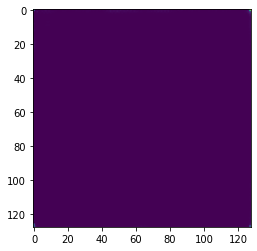

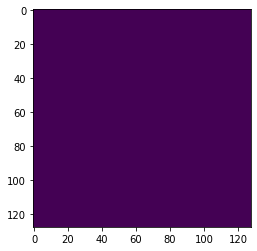

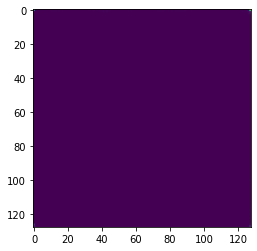

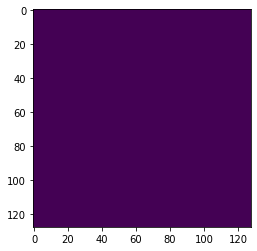

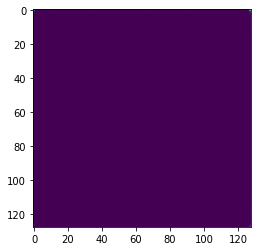

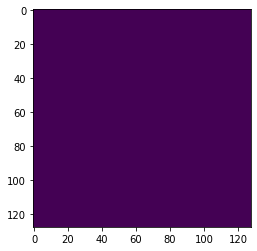

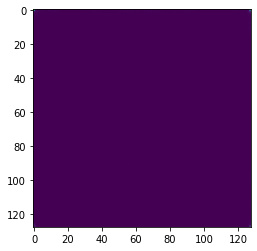

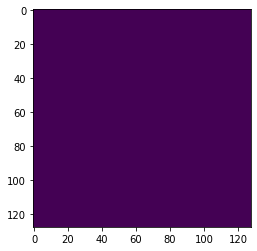

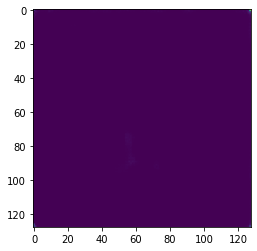

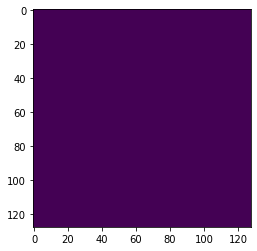

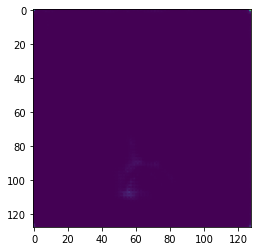

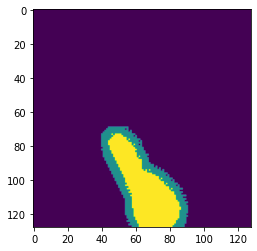

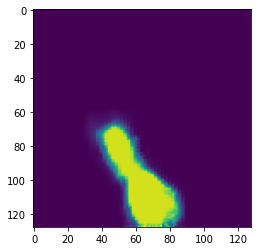

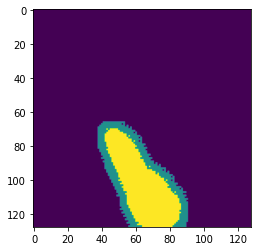

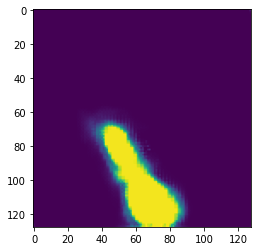

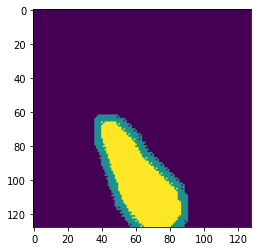

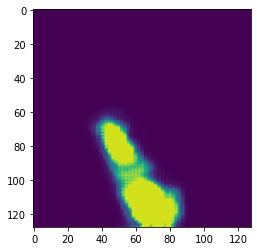

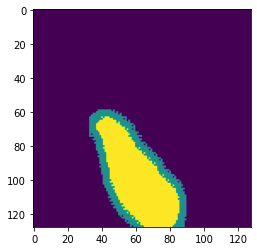

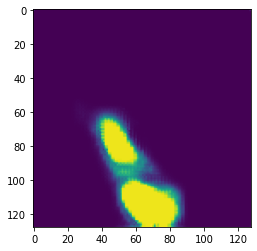

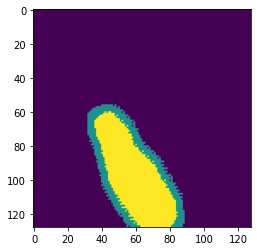

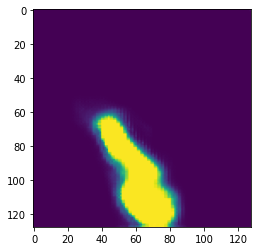

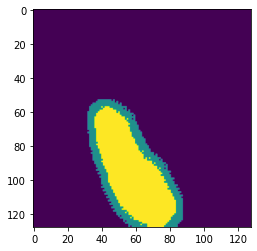

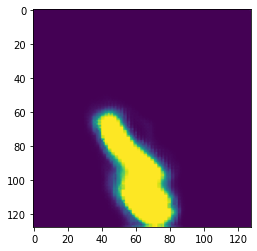

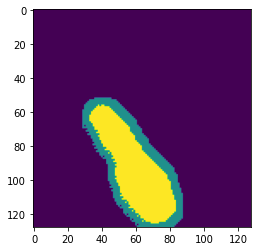

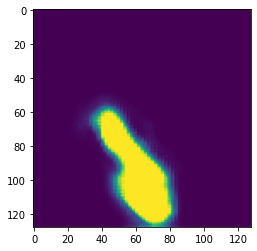

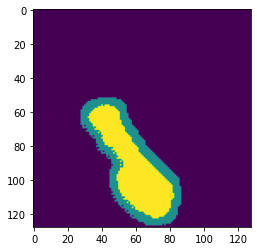

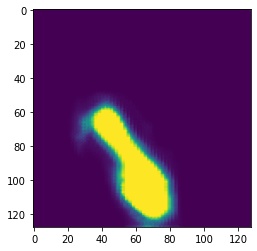

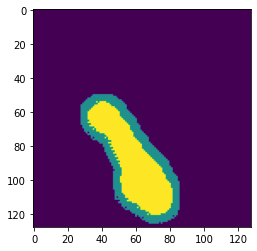

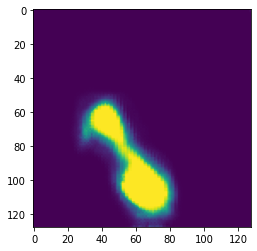

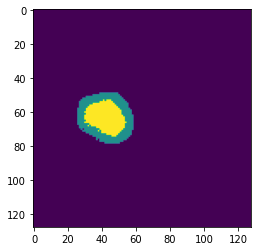

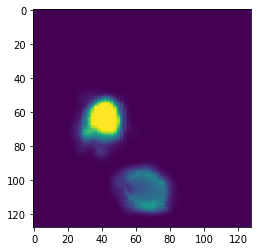

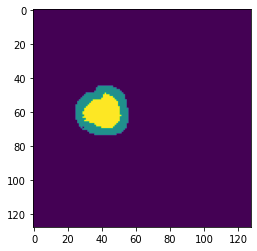

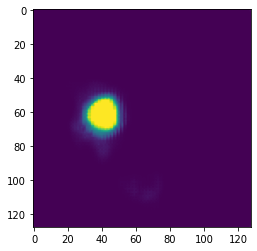

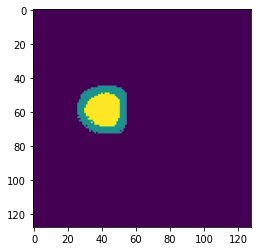

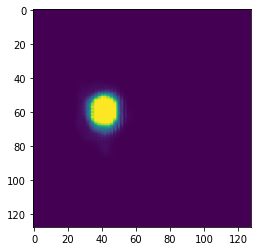

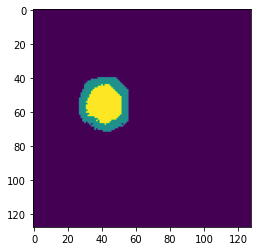

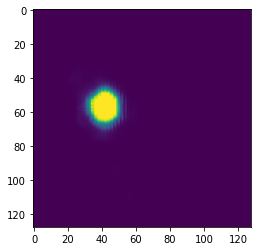

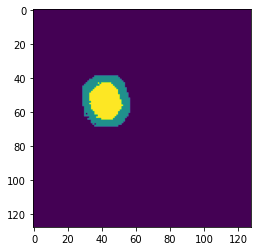

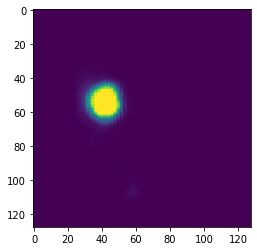

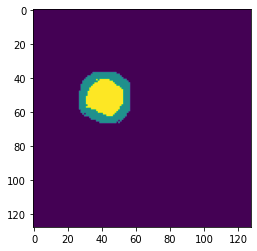

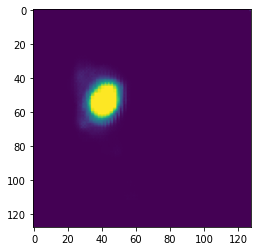

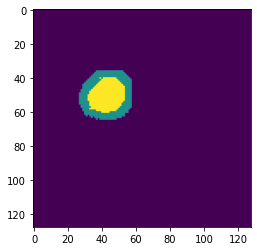

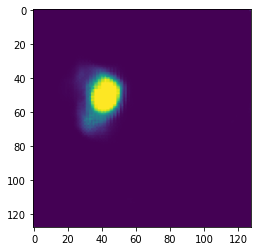

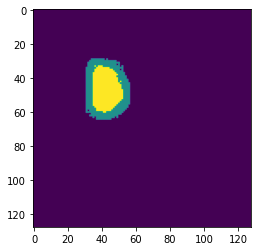

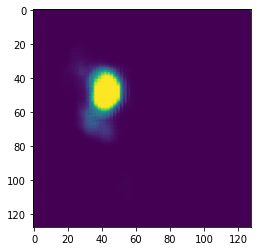

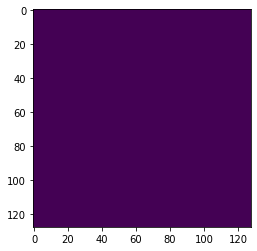

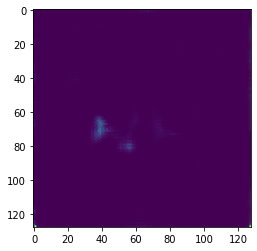

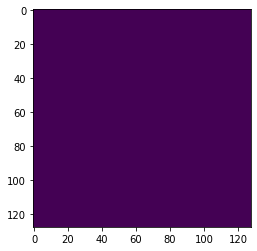

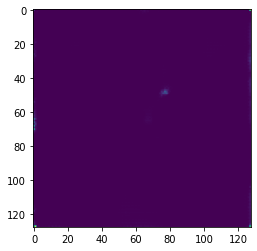

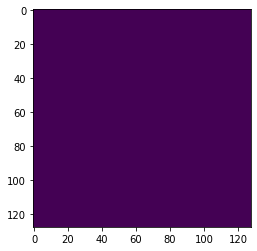

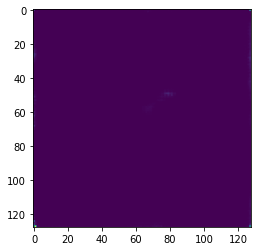

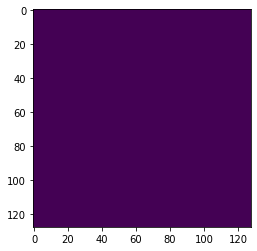

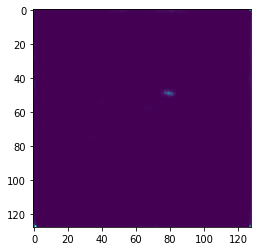

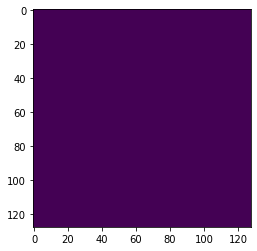

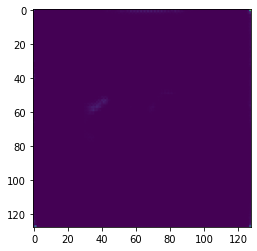

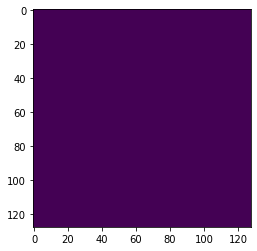

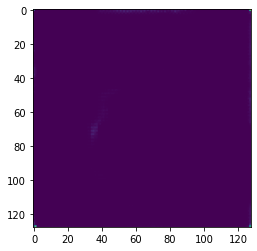

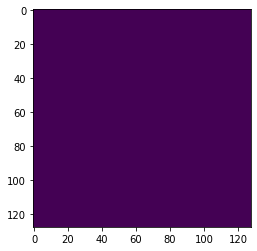

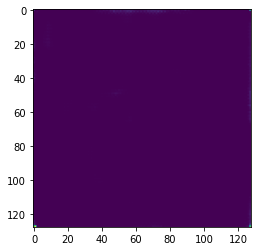

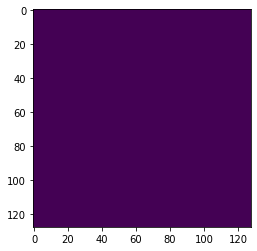

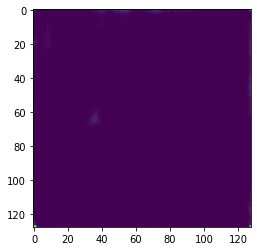

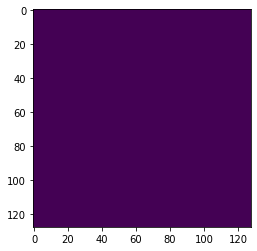

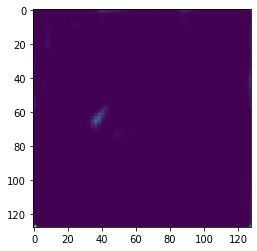

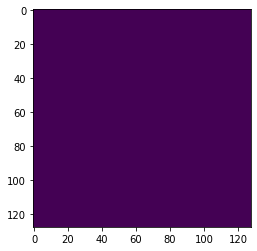

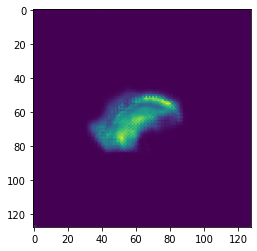

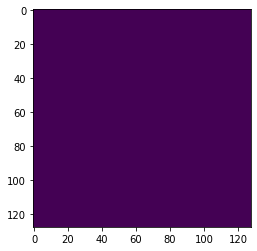

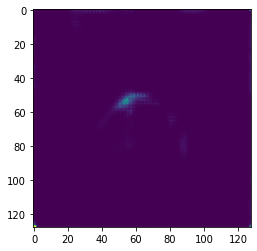

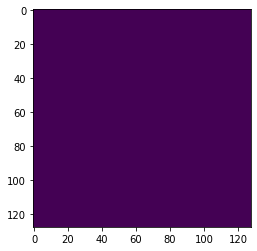

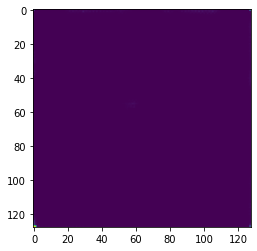

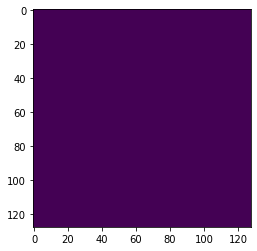

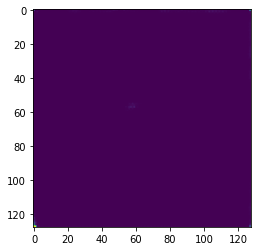

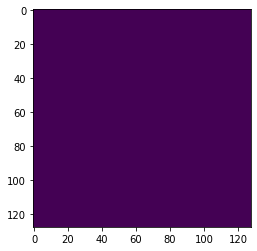

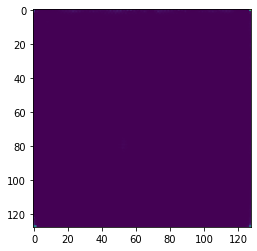

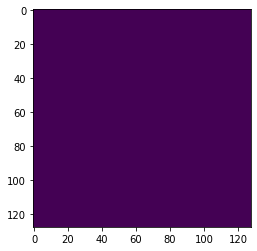

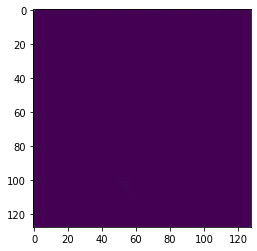

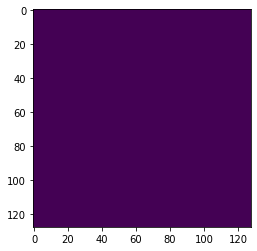

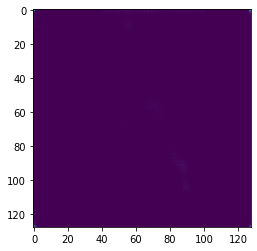

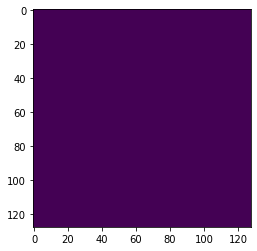

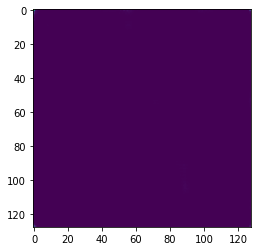

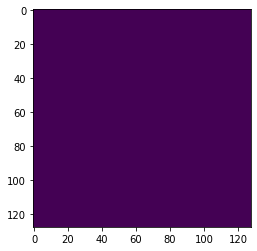

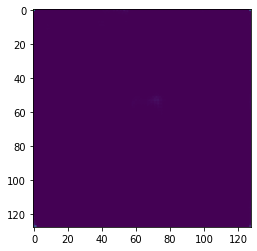

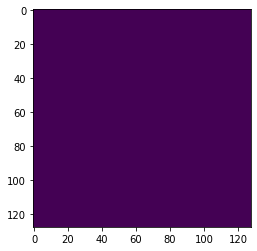

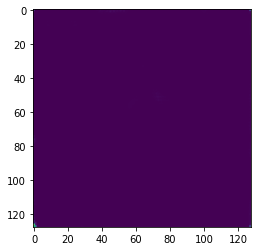

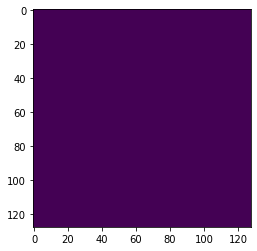

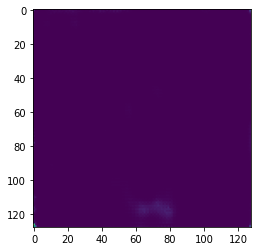

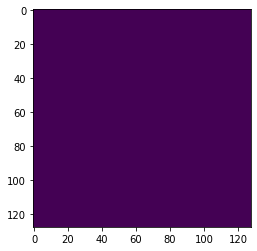

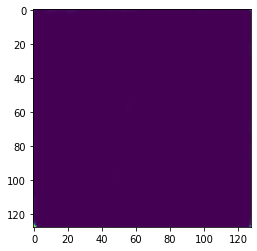

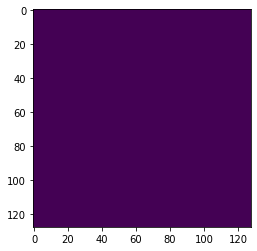

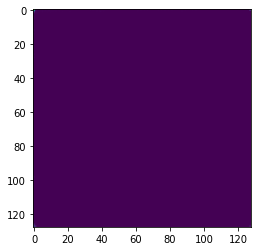

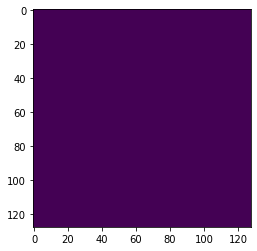

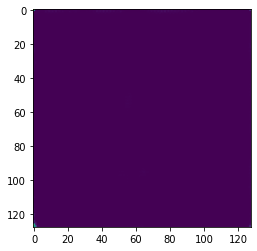

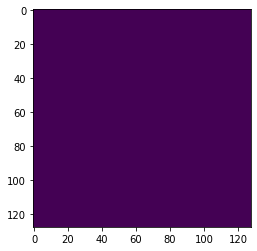

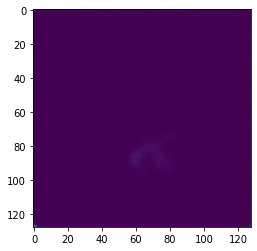

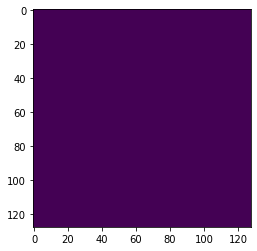

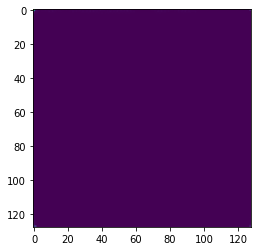

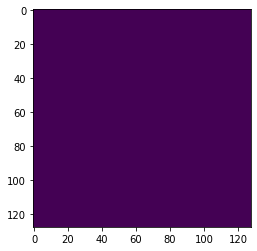

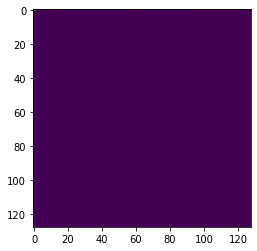

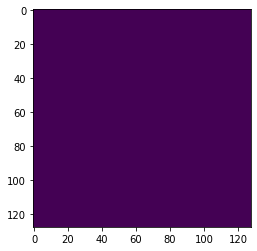

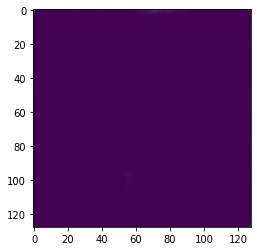

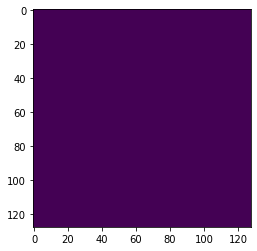

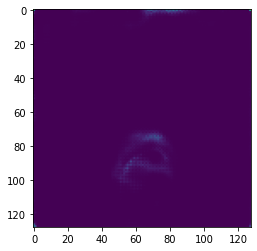

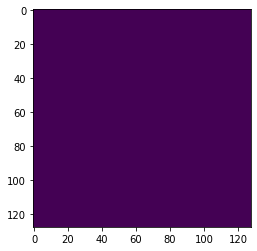

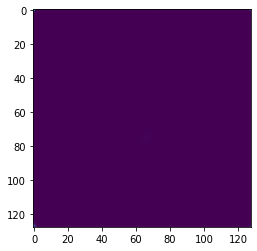

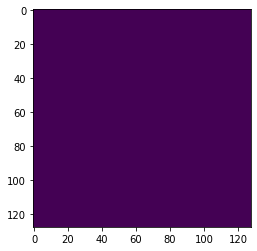

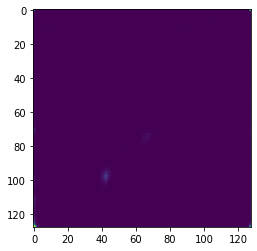

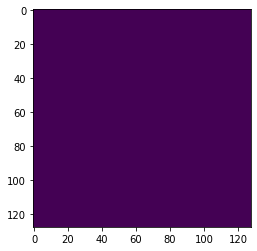

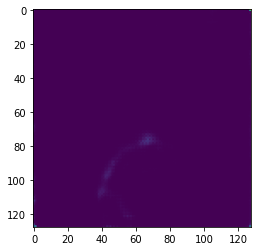

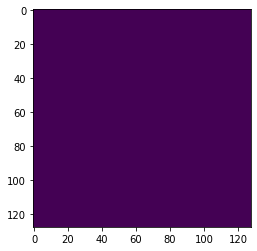

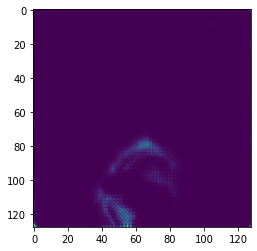

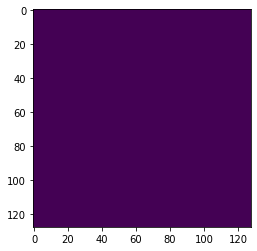

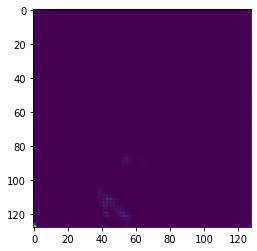

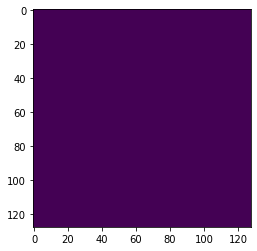

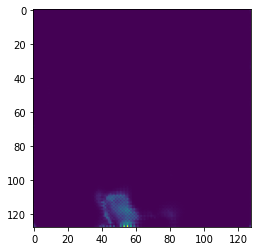

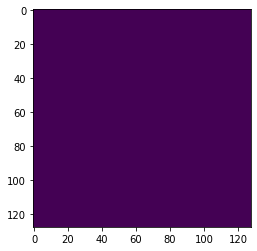

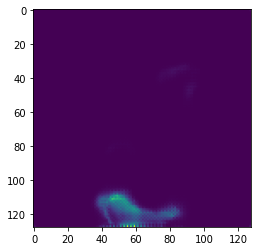

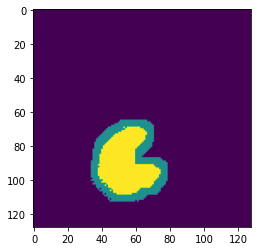

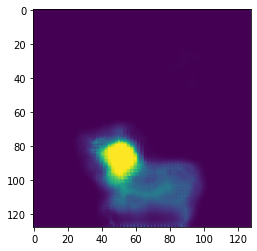

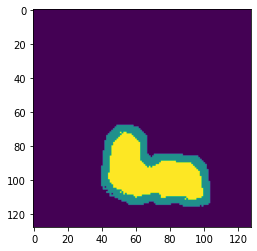

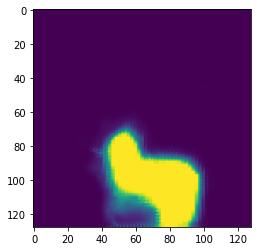

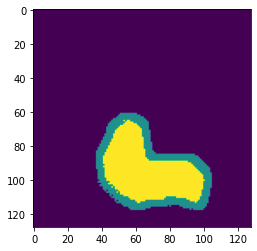

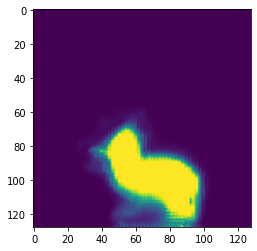

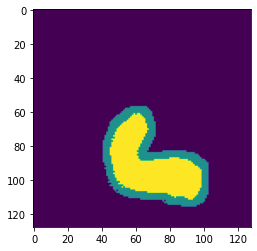

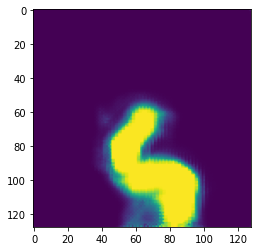

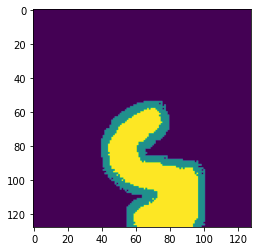

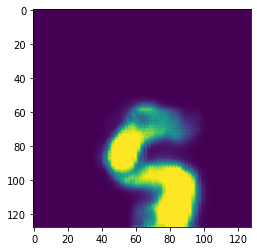

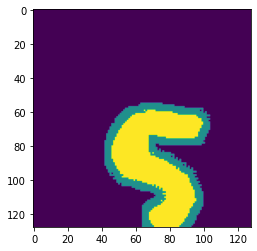

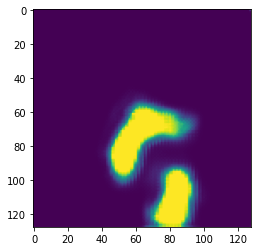

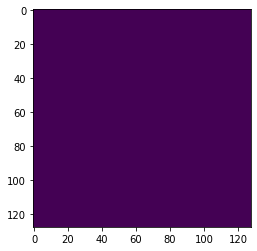

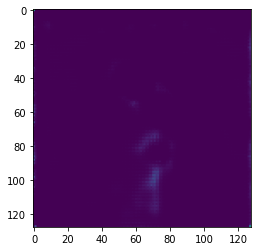

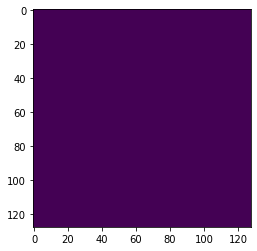

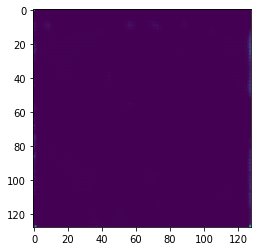

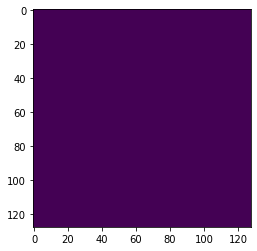

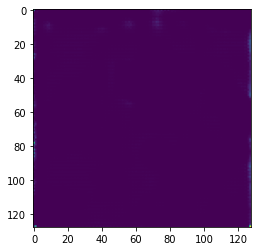

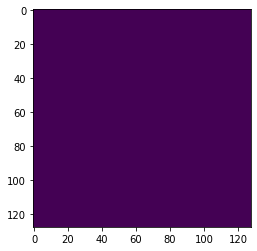

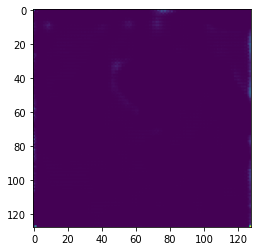

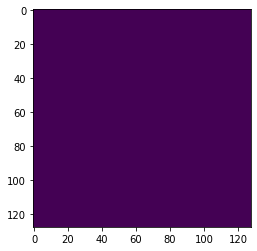

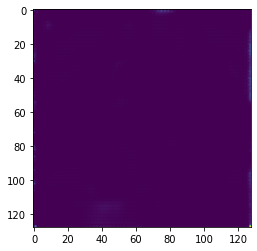

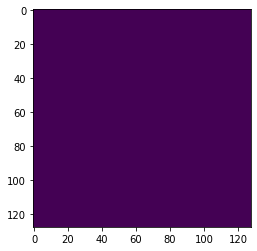

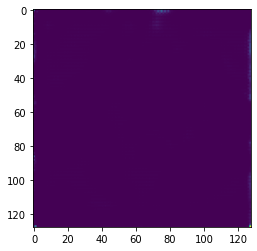

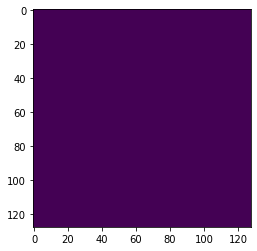

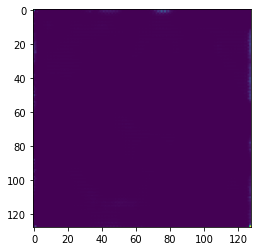

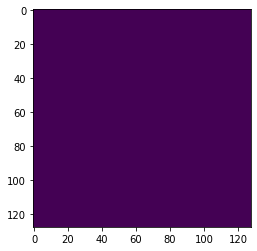

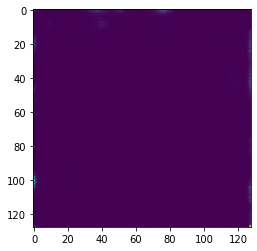

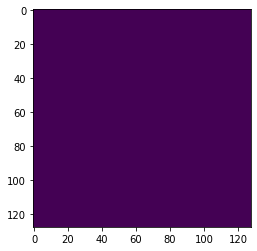

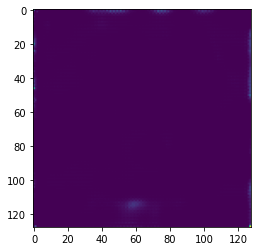

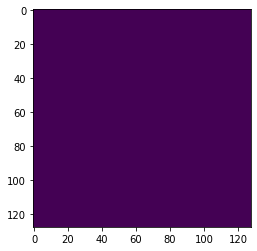

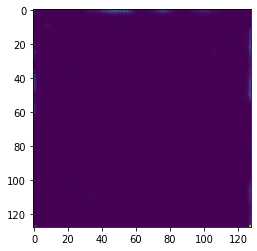

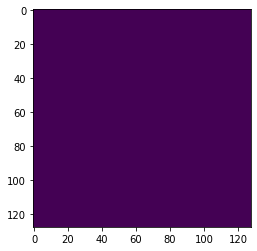

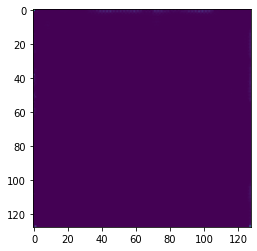

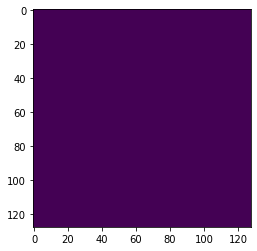

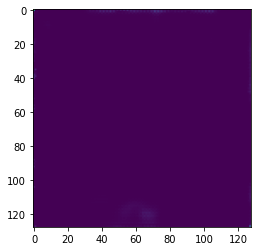

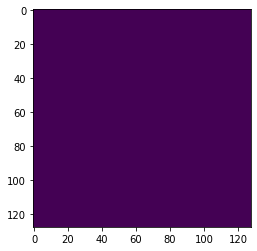

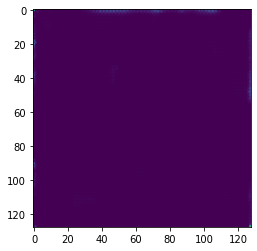

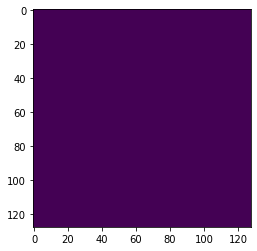

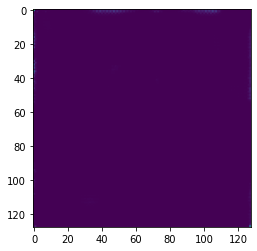

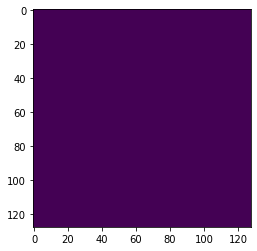

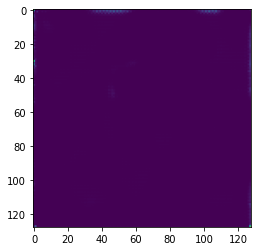

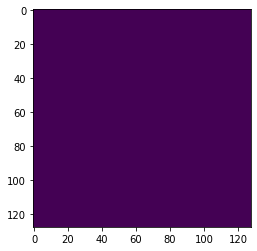

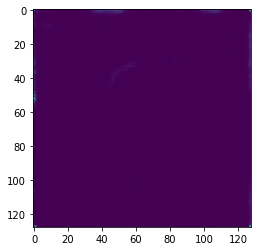

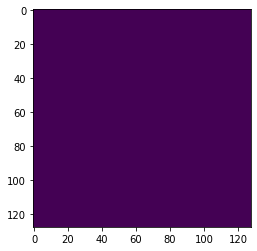

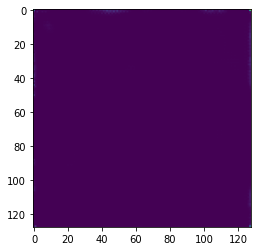

In [ ]:
def getPred(dFrom, dTo, v):
    for i in range(128):
        for j in range(128):
            dTo[i][j][0] = dFrom[i][j][v]
def testModel(no, v):
    imgTest = imgD[no]
    imgTest = imgTest.reshape((1, 128, 128, 1))

    imgMask = imgY[no]
    imgMask = imgMask.reshape((128, 128))
    imgTestMask = unet_model.predict(imgTest)[0]
    # print(imgTestMask.shape)
    # return imgTestMask

    imgTestMask1 = np.array([0.0 for i in range(128 * 128)])
    imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
    getPred(imgTestMask, imgTestMask1, v)
    imgTestMask1 = imgTestMask1.reshape((128, 128))
    plt.imshow(imgMask)
    plt.show()
    plt.imshow(imgTestMask1)
    plt.show()
    # plt.imshow(imgTestMask)
    # plt.show()
for i in range(100):
    testModel(i, 2)
# testModel(16, 1)
# testModel(16, 2)

In [ ]:
unet_model.save("{}/0_range/model_{}-3_128".format(dataPath, 100))

In [ ]:
def getPredY3(dFrom1, dFrom2, dFrom3, dTo):
    for i in range(128):
        for j in range(128):
            dTo[i][j][0] = dFrom1[i][j][0]
            dTo[i][j][1] = dFrom2[i][j][0]
            dTo[i][j][2] = dFrom3[i][j][0]
def getAllBorderYVals(noFrom, noTo):
    global dataPath
    imgs = [ ]
    for no in range(noFrom, noTo):
        for z in range(2, readImgBound(no)["depth"]):
            imgt = np.array(getImgBound(no, z - 2, False, -2000, 2000, 'dImg'))
            imgt = imgt.reshape((1, 128, 128, 1))
            imgTestMask = unet_model.predict(imgt)[0]
            imgTestMask1 = np.array([0.0 for i in range(128 * 128)])
            imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
            getPred(imgTestMask, imgTestMask1, 2)
            imgTestMask1 = imgTestMask1.reshape((128, 128, 1))

            imgt = np.array(getImgBound(no, z - 1, False, -2000, 2000, 'dImg'))
            imgt = imgt.reshape((1, 128, 128, 1))
            imgTestMask = unet_model.predict(imgt)[0]
            imgTestMask2 = np.array([0.0 for i in range(128 * 128)])
            imgTestMask2 = imgTestMask2.reshape((128, 128, 1))
            getPred(imgTestMask, imgTestMask2, 2)
            imgTestMask2 = imgTestMask2.reshape((128, 128, 1))

            imgt = np.array(getImgBound(no, z, False, -2000, 2000, 'dImg'))
            imgt = imgt.reshape((128, 128, 1))
            imgTestMask3 = np.array([0.0 for i in range(128 * 128 * 3)])
            imgTestMask3 = imgTestMask3.reshape((128, 128, 3))
            getPredY3(imgTestMask1, imgTestMask2, imgt, imgTestMask3)
            imgs.append(imgTestMask3)
        print(no)
    imgs = np.array(imgs)
    # print(imgs.shape)
    imgs = imgs.reshape((imgs.shape[0], 128, 128, 3))
    np.save("{}/0_range/{}-{}-3-pred-layer2x3-y_128".format(dataPath, noFrom, noTo), imgs)
    return imgs
# def getAllBorderYVals(noFrom, noTo):
#     imgD2 = np.load("{}/0_range/{}-{}-2_128.npy".format(dataPath, noFrom, noTo))
#     imgs = [ ]
#     for i in range(imgD2.shape[0]):
#         imgTest = imgD2[i]
#         imgTest = imgTest.reshape((1, 128, 128, 1))
#         imgTestMask = unet_model.predict(imgTest)[0]

#         imgTestMask1 = np.array([0.0 for i in range(128 * 128)])
#         imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
#         getPred(imgTestMask, imgTestMask1, 2)
#         imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
#         imgs.append(imgTestMask1)
#     imgs = np.array(imgs)

#     # imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
#     np.save("{}/0_range/{}-{}-3-pred-layer2-y_128".format(dataPath, noFrom, noTo), imgs)
#     return imgs
#     # return imgs

In [ ]:
imgYPred = getAllBorderYVals(80, 100)
imgYPred.shape

In [ ]:
imgYPred = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 1, 11))
imgYPred.shape

(365, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


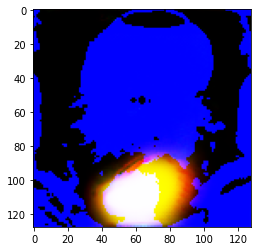

In [ ]:
plt.imshow(imgYPred[10])
plt.show()

In [ ]:
def build_unet_model(inX, inY):
    # inputs
    inputs = layers.Input(shape=(inX, inY, 3))
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = layers.Conv2D(3, 1, padding="same", activation = "softmax")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model

In [ ]:
unet_model2 = build_unet_model(128, 128)
unet_model2.summary()

In [ ]:
unet_model2.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")

In [ ]:
imgD = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 80, 100))
imgD.shape

(640, 128, 128, 3)

In [ ]:
imgY = np.load("{}/0_range/{}-{}-skip-3-y_128.npy".format(dataPath, 80, 100))
imgY.shape

(640, 128, 128, 1)

In [ ]:
res = unet_model2.fit(imgD, imgY, epochs=10)

Epoch 1/10
20/20 [==============================] - 10s 438ms/step - loss: 0.1900 - accuracy: 0.9376
Epoch 2/10
20/20 [==============================] - 9s 440ms/step - loss: 0.1500 - accuracy: 0.9483
Epoch 3/10
20/20 [==============================] - 9s 440ms/step - loss: 0.1395 - accuracy: 0.9498
Epoch 4/10
20/20 [==============================] - 9s 442ms/step - loss: 0.1378 - accuracy: 0.9508
Epoch 5/10
20/20 [==============================] - 9s 443ms/step - loss: 0.1300 - accuracy: 0.9528
Epoch 6/10
20/20 [==============================] - 9s 445ms/step - loss: 0.1303 - accuracy: 0.9531
Epoch 7/10
20/20 [==============================] - 9s 444ms/step - loss: 0.1282 - accuracy: 0.9535
Epoch 8/10
20/20 [==============================] - 9s 445ms/step - loss: 0.1231 - accuracy: 0.9548
Epoch 9/10
20/20 [==============================] - 9s 447ms/step - loss: 0.1162 - accuracy: 0.9567
Epoch 10/10
20/20 [==============================] - 9s 447ms/step - loss: 0.1218 - accuracy: 0.954

In [ ]:
def getPred(dFrom, dTo, v):
    for i in range(128):
        for j in range(128):
            dTo[i][j][0] = dFrom[i][j][v]
def testModel(no, v):
    imgTest = imgD[no]
    imgTest = imgTest.reshape((1, 128, 128, 3))

    imgMask = imgY[no]
    imgMask = imgMask.reshape((128, 128))
    imgTestMask = unet_model2.predict(imgTest)[0]
    # print(imgTestMask.shape)
    # return imgTestMask

    imgTestMask1 = np.array([0.0 for i in range(128 * 128)])
    imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
    getPred(imgTestMask, imgTestMask1, v)
    imgTestMask1 = imgTestMask1.reshape((128, 128))
    plt.imshow(imgMask)
    plt.show()
    # plt.imshow(imgTestMask1)
    # plt.show()
    plt.imshow(imgTestMask)
    plt.show()
for i in range(100):
    testModel(i, 2)
# testModel(10, 2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
unet_model2.save("{}/0_range/model_{}-3x3-boundary-out_128".format(dataPath, 100))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/project2/data/nifti/0_range/model_100-3x3-boundary-out_128/assets


In [ ]:
def getPred(dFrom, dTo, v):
    for i in range(128):
        for j in range(128):
            dTo[i][j][0] = dFrom[i][j][v]
def testModel(no, v):
    imgTest = imgD[no]
    imgTest = imgTest.reshape((1, 128, 128, 3))

    imgMask = imgY[no]
    imgMask = imgMask.reshape((128, 128))
    imgTestMask = unet_model2.predict(imgTest)[0]
    # print(imgTestMask.shape)
    # return imgTestMask

    imgTestMask1 = np.array([0.0 for i in range(128 * 128)])
    imgTestMask1 = imgTestMask1.reshape((128, 128, 1))
    getPred(imgTestMask, imgTestMask1, v)
    imgTestMask1 = imgTestMask1.reshape((128, 128))
    plt.imshow(imgMask)
    plt.show()
    # plt.imshow(imgTestMask1)
    # plt.show()
    plt.imshow(imgTestMask)
    plt.show()
for i in range(100):
    testModel(i, 2)
# testModel(10, 2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imgD = np.load("{}/0_range/{}-{}-2_128.npy".format(dataPath, 80, 100))
imgD.shape

(680, 128, 128, 1)

In [ ]:
for i in range(100):
    printImg(imgD[i].reshape(128, 128))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imgD2 = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 80, 100))
imgD2.shape

(640, 128, 128, 3)

In [ ]:
for i in range(100):
    printImg(imgD2[i])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imgD11 = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 1, 11))
imgD12 = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 11, 40))
imgD13 = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 40, 80))
imgD14 = np.load("{}/0_range/{}-{}-3-pred-layer2x3-y_128.npy".format(dataPath, 80, 100))
imgD11.shape[0] + imgD12.shape[0] + imgD13.shape[0] + imgD14.shape[0]

3661